In [1]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
%matplotlib inline

import os
import glob
import matplotlib as mpl

from scipy.optimize import curve_fit
from scipy.stats import skewnorm
import scipy.integrate as integrate

In [2]:
Iax_dir = "/Users/tktakaro/Documents/Type-Iax-HST" #"D:/Research/Type-Iax-HST"
mist_dir = Iax_dir + "/MIST/WFC3-UVIS"

catalog = np.loadtxt(Iax_dir+"/new_files/sn2008A/sn2008A_new") # Imports dolphot output from ACS only

In [3]:
pos_predict = np.zeros((catalog.shape[0],2))
info_predict = np.zeros(np.shape(catalog))

j = 0 # Iteration variable for positions array
for i in range(catalog.shape[0]): # Cycles through each object in catalog
    # Checks to make sure point is "good"
    # Good defined by: 1. S/N > 3     2. Sharpness < .3    3. Roundness < 1     4. Crowding < .1 
    if ((catalog[i][5] >= 3.5)&(abs(catalog[i][6]) < .3)&(abs(catalog[i][7]) < 1)
        &(catalog[i][9] < .1)):
        pos_predict[j][0] = catalog[i][2] # Assigns X position
        pos_predict[j][1] = catalog[i][3] # Assigns Y position
        info_predict[j] = catalog[i]
        j = j + 1
                
# Trims all zeros from end of positions array, left from "bad" objects
pos_predict = pos_predict[~np.all(pos_predict == 0, axis=1)]
info_predict = info_predict[~np.all(info_predict == 0, axis=1)]

# Saves high S/N object X,Y positions
np.savetxt("Region_files/sn2008A_Prediction.reg", pos_predict, '%5.2f')

In [4]:
catalog_WFC3 = np.loadtxt(Iax_dir+"/new_files/sn2008A/sn2008A_WFC3") # Imports dolphot output from WFC3 only

In [5]:
pos_predict_WFC3 = np.zeros((catalog_WFC3.shape[0],2))
info_predict_WFC3 = np.zeros(np.shape(catalog_WFC3))

j = 0 # Iteration variable for positions array
for i in range(catalog_WFC3.shape[0]): # Cycles through each object in catalog
    # Checks to make sure point is "good"
    # Good defined by: 1. S/N > 3     2. Sharpness < .3    3. Roundness < 1     4. Crowding < .1 
    if ((catalog_WFC3[i][5] >= 3.5)&(abs(catalog_WFC3[i][6]) < .3)&(abs(catalog_WFC3[i][7]) < 1)
        &(catalog_WFC3[i][9] < .1)):
        pos_predict_WFC3[j][0] = catalog_WFC3[i][2] # Assigns X position
        pos_predict_WFC3[j][1] = catalog_WFC3[i][3] # Assigns Y position
        info_predict_WFC3[j] = catalog_WFC3[i]
        j = j + 1
                
# Trims all zeros from end of positions array, left from "bad" objects
pos_predict_WFC3 = pos_predict_WFC3[~np.all(pos_predict_WFC3 == 0, axis=1)]
info_predict_WFC3 = info_predict_WFC3[~np.all(info_predict_WFC3 == 0, axis=1)]

# Saves high S/N object X,Y positions
np.savetxt("Region_files/sn2008A_Prediction_WFC3.reg", pos_predict_WFC3, '%5.2f')

## Note: Only 2 sources within 200 pc, other than the SN

In [6]:
asci = open(Iax_dir + "/jupyter_notebooks/Region_files/sn2008A_200pc_new.reg", "r+")

def mysplit(s, delim=None):
    return [x for x in s.split(delim) if x]

text = asci.readlines()
region = np.zeros([3,2])
for i in range(3):
    region[i][0] = mysplit(text[i], ' ')[0]
    region[i][1] = mysplit(text[i], ' ')[1]
region = region[~np.all(region == 0, axis=1)]

# Info for each star chosen as real 
info = np.zeros([region.shape[0],info_predict.shape[1]])

j = 0 # Iteration variable for region array
for i in range(info_predict.shape[0]): # Cycles through each star predicted above
    if (region[j][0] == pos_predict[i][0])&(region[j][1] == pos_predict[i][1]):
        info[j] = info_predict[i]
        j = j + 1
        if j == region.shape[0]: break

In [7]:
print(info[:,5])

[ 24.8   4.3   4.2]


In [9]:
# Using IRAF to compute actual concentration index, i.e. photometry at .5 pixels to photometry at 3 pixels
ascii_1 = open("/Users/tktakaro/Documents/Type-Iax-HST/new_files/sn2008A/final_ACS_f625w_crc1.mag.1")
ascii_2 = open("/Users/tktakaro/Documents/Type-Iax-HST/new_files/sn2008A/final_ACS_f625w_crc1.mag.2")
text_1 = ascii_1.readlines()
text_2 = ascii_2.readlines()

concentration = np.zeros(3)
for i in range(3):
    if mysplit(text_1[5*i + 79])[4] == 'INDEF': # Removes objects with no defined magnitude at .5 pixels
        concentration[i] = 99
    elif mysplit(text_2[5*i + 79])[4] == 'INDEF': # Removes objects with no defined magnitude at 3 pixels
        concentration[i] = -99
    else: concentration[i] = float(mysplit(text_1[5*i + 79])[4]) - float(mysplit(text_2[5*i + 79])[4])
ascii_1.close()
ascii_2.close()

In [10]:
# Cut out clusters (identified as objects with concentration parameter < 2.3, from Chandar et. al. 2010)
new_info = np.zeros(info.shape)
for i in range(3):
    if (concentration[i] < 2.3): # & (concentration[i] >= 0):
        new_info[i] = info[i]
new_info = new_info[~np.all(new_info == 0, axis=1)]

In [11]:
print(new_info.shape)

(1, 466)


There is only one star around, too few to fit.

## Loading in False Stars to determine limiting magnitude

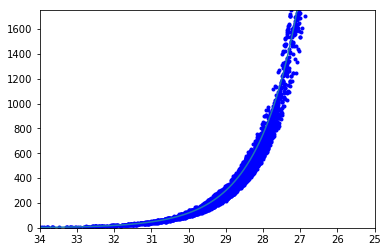

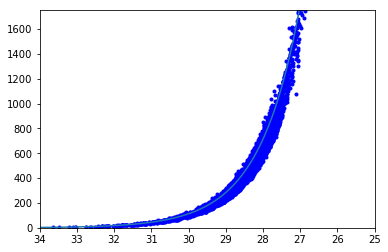

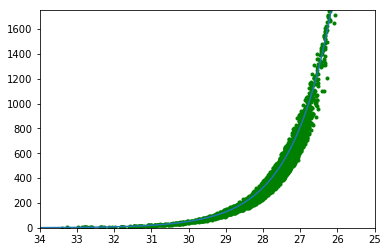

In [12]:
x_array = np.linspace(26,34,100)

plt.ylim(0,1750)
plt.xlim(34,25)
plt.plot(info_predict[:,15], info_predict[:,11], 'b.')
plt.plot(x_array, 1.65*3750 * 10**((25.711 - x_array)/2.5))
plt.show()

plt.ylim(0,1750)
plt.xlim(34,25)
plt.plot(info_predict[:,28], info_predict[:,24], 'b.')
plt.plot(x_array, 1.65*3530 * 10**((25.718 - x_array)/2.5))
plt.show()

plt.ylim(0,1750)
plt.xlim(34,25)
plt.plot(info_predict[:,41], info_predict[:,37], 'g.')
plt.plot(x_array, 1.65*2484 * 10**((25.241 - x_array)/2.5))
plt.show()

In [13]:
x_pos = 3440 + 35*np.random.rand(50)
y_pos = 1960 + 35*np.random.rand(50)

f435w_mags = 17 + 12*np.random.rand(1000)
Iax_dir = "/Users/tktakaro/Documents/Type-Iax-HST"
file = open(Iax_dir + "/new_files/sn2008A/fake_stars.list", "w+")
for j in range(x_pos.size):
    for i in range(f435w_mags.size):
        file.write('0 1 {x} {y} {f4} {f4} {f4} {f4}\n'.format(x=x_pos[j], y=y_pos[j], f4=f435w_mags[i]))
file.close()

In [35]:
x_pos = 2538 + 13*np.random.rand(50)
y_pos = 2618 + 13*np.random.rand(50)

fake_stars = np.loadtxt(Iax_dir + "/new_files/sn2008A/fake_stars.list") #open(Iax_dir + "/new_files/sn2008A/fake_stars.list", "r")
for p in range(len(x_pos)):
    fake_stars[(f435w_mags.size*p):(f435w_mags.size*(p+1)),2] = x_pos[p]
    fake_stars[(f435w_mags.size*p):(f435w_mags.size*(p+1)),3] = y_pos[p]
np.savetxt(Iax_dir + "/new_files/sn2008A/fake_stars_WFC3.list", fake_stars, fmt='%1.3f')

In [14]:
# Loading in the false star test
catalog_false_f555w = np.loadtxt(Iax_dir + "/new_files/sn2008A/sn2008A_f555w.fake")
catalog_false_f625w = np.loadtxt(Iax_dir + "/new_files/sn2008A/sn2008A_f625w.fake")
catalog_false_f775w = np.loadtxt(Iax_dir + "/new_files/sn2008A/sn2008A_f775w.fake")
# 28 spots before recovered data

catalog_false_f110w = np.loadtxt(Iax_dir + "/new_files/sn2008A/sn2008A_WFC3.fake")

In [15]:
i = 22
print(catalog_false_f110w[i,30], catalog_false_f110w[i,31])
print(catalog_false_f110w[i,43])

0.0 0.0
99.999


In [17]:
print(catalog_false_f555w.shape)
print(catalog_false_f110w.shape)

(50000, 208)
(4000, 208)


In [16]:
recovered_mags = np.zeros([50000,23]) # 1. X position, 2. Y position, 3. Inserted Mag, 4. Recovered mag (f435w),
# 5. S/N (f435w), 6. Sharpness (f435w), 7. Roundness (f435w), 8. Crowding (f435w), 9.+ same, for other filters
for i in range(catalog_false_f555w.shape[0]):
    # X, Y, and Inserted Magnitude
    recovered_mags[i,0] = catalog_false_f555w[i,2]
    recovered_mags[i,1] = catalog_false_f555w[i,3]
    recovered_mags[i,2] = catalog_false_f555w[i,5]
    # Recovered mag in F555W
    if (catalog_false_f555w[i,30] == 0) and (catalog_false_f555w[i,31] == 0):
        recovered_mags[i,3] = 99.999
    else:
        recovered_mags[i,3] = catalog_false_f555w[i,43]
        recovered_mags[i,4:7] = catalog_false_f555w[i,33:36]
        recovered_mags[i,7] = catalog_false_f555w[i,37]
    # Recovered mag in F625W
    if (catalog_false_f625w[i,30] == 0) and (catalog_false_f625w[i,31] == 0):
        recovered_mags[i,8] = 99.999
    else:
        recovered_mags[i,8] = catalog_false_f625w[i,43]
        recovered_mags[i,9:12] = catalog_false_f625w[i,33:36]
        recovered_mags[i,12] = catalog_false_f625w[i,37]
    # Recovered mag in F775W
    if (catalog_false_f775w[i,22] == 0) and (catalog_false_f775w[i,23] == 0):
        recovered_mags[i,13] = 99.999
    else:
        recovered_mags[i,13] = catalog_false_f775w[i,35]
        recovered_mags[i,14:17] = catalog_false_f775w[i,25:28]
        recovered_mags[i,17] = catalog_false_f775w[i,29]
    """
    # Recovered mag in WFC3_F110W
    if (catalog_false_f110w[i,30] == 0) and (catalog_false_f110w[i,31] == 0):
        recovered_mags[i,18] = 99.999
    else:
        recovered_mags[i,18] = catalog_false_f110w[i,43]
        recovered_mags[i,19:22] = catalog_false_f110w[i,33:36]
        recovered_mags[i,22] = catalog_false_f110w[i,37] """

IndexError: index 4000 is out of bounds for axis 0 with size 4000

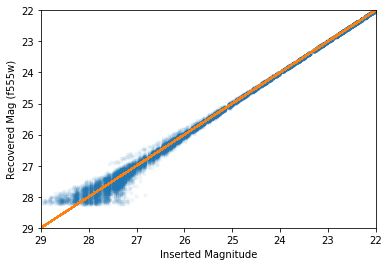

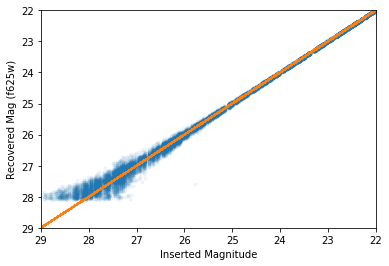

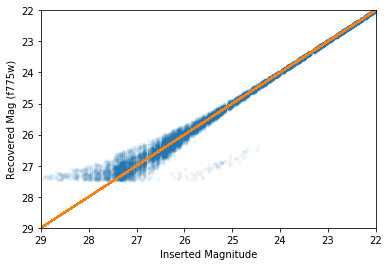

In [41]:
plt.plot(recovered_mags[:,2], recovered_mags[:,3], '.', alpha=.05)
plt.plot(recovered_mags[:,2], recovered_mags[:,2], '--')
plt.ylim(29,22)
plt.xlim(29,22)
plt.xlabel("Inserted Magnitude")
plt.ylabel("Recovered Mag (f555w)")
plt.show()

plt.plot(recovered_mags[:,2], recovered_mags[:,8], '.', alpha=.05)
plt.plot(recovered_mags[:,2], recovered_mags[:,2], '--')
plt.ylim(29,22)
plt.xlim(29,22)
plt.xlabel("Inserted Magnitude")
plt.ylabel("Recovered Mag (f625w)")
plt.show()

plt.plot(recovered_mags[:,2], recovered_mags[:,13], '.', alpha=.05)
plt.plot(recovered_mags[:,2], recovered_mags[:,2], '--')
plt.ylim(29,22)
plt.xlim(29,22)
plt.xlabel("Inserted Magnitude")
plt.ylabel("Recovered Mag (f775w)")
plt.show()

In [43]:
f555w_mags = []
f555w_recover = []
f625w_mags = []
f625w_recover = []
f775w_mags = []
f775w_recover = []
# Calculate recovery percentage as a function of inserted mag
for i in range(catalog_false_f555w.shape[0]):
    f555w_mags.append(recovered_mags[i,2])
    f625w_mags.append(recovered_mags[i,2])
    f775w_mags.append(recovered_mags[i,2])
    if abs(recovered_mags[i,2] - recovered_mags[i,3]) < .5:
        f555w_recover.append(recovered_mags[i,2])
    if abs(recovered_mags[i,2] - recovered_mags[i,8]) < .5:
        f625w_recover.append(recovered_mags[i,2])
    if abs(recovered_mags[i,2] - recovered_mags[i,13]) < .5:
        f775w_recover.append(recovered_mags[i,2])

In [44]:
# Setting up the histogram bins w/ .1 mag resolution
b = []
for i in range(121):
    b.append(17 + i/10.)

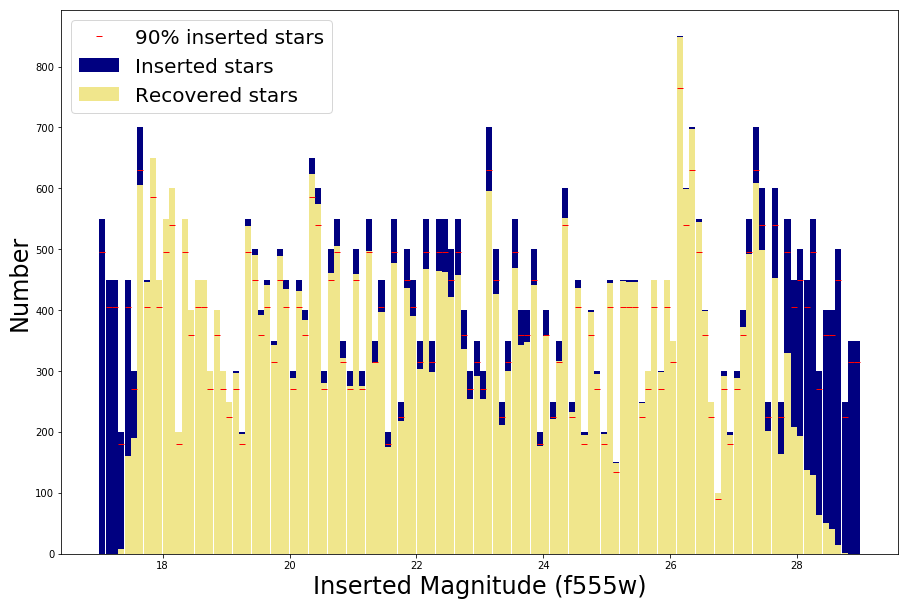

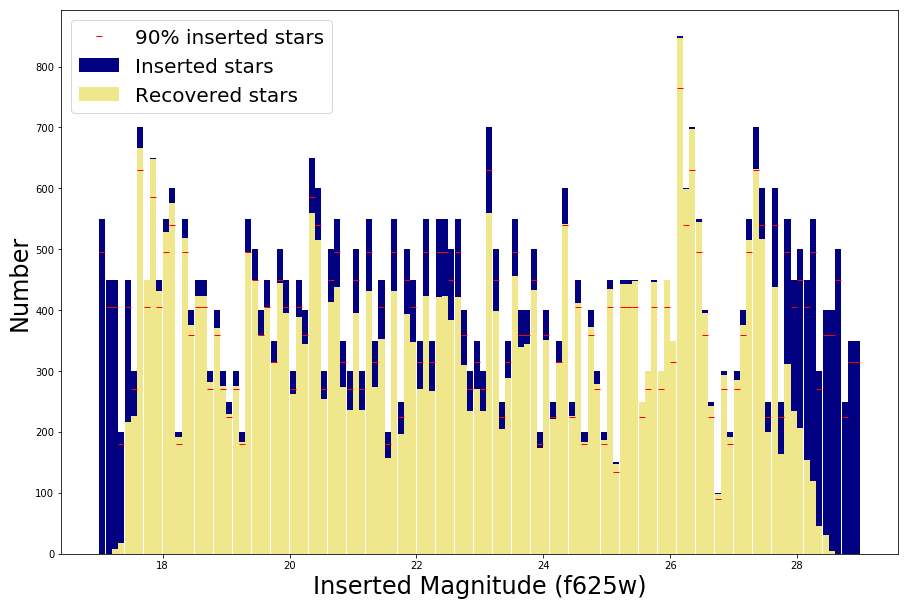

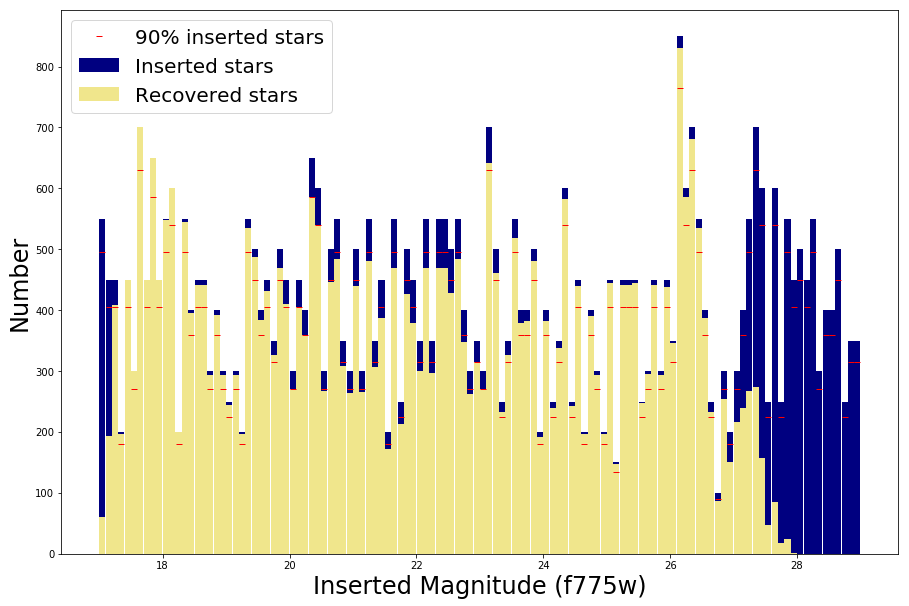

In [49]:
plt.subplots(figsize=(15, 10))
h5 = plt.hist(f555w_mags, bins=b, facecolor='navy', rwidth=.95, label='Inserted stars')
r5 = plt.hist(f555w_recover, bins=b, rwidth=.95, facecolor='khaki', label='Recovered stars')
plt.plot(h5[1][:-1]+.05, .9*h5[0], 'r_', markersize=6, label='90% inserted stars')
plt.xlabel("Inserted Magnitude (f555w)", fontsize=24)
plt.ylabel("Number", fontsize=24)
plt.legend(fontsize=20)
plt.show()

plt.subplots(figsize=(15, 10))
h6 = plt.hist(f625w_mags, bins=b, facecolor='navy', rwidth=.95, label='Inserted stars')
r6 = plt.hist(f625w_recover, bins=b, rwidth=.95, facecolor='khaki', label='Recovered stars')
plt.plot(h6[1][:-1]+.05, .9*h6[0], 'r_', markersize=6, label='90% inserted stars')
plt.xlabel("Inserted Magnitude (f625w)", fontsize=24)
plt.ylabel("Number", fontsize=24)
plt.legend(fontsize=20)
plt.show()

plt.subplots(figsize=(15, 10))
h7 = plt.hist(f775w_mags, bins=b, facecolor='navy', rwidth=.95, label='Inserted stars')
r7 = plt.hist(f775w_recover, bins=b, rwidth=.95, facecolor='khaki', label='Recovered stars')
plt.plot(h7[1][:-1]+.05, .9*h7[0], 'r_', markersize=6, label='90% inserted stars')
plt.xlabel("Inserted Magnitude (f775w)", fontsize=24)
plt.ylabel("Number", fontsize=24)
plt.legend(fontsize=20)
plt.show()

frac_f555w = r5[0]/h5[0]
frac_f625w = r6[0]/h6[0]
frac_f775w = r7[0]/h7[0]

[ 27.25  27.35  26.65]


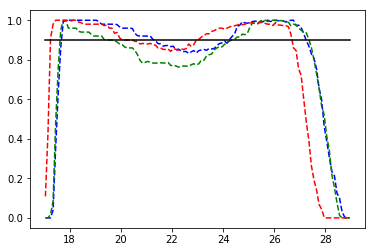

In [55]:
from scipy.interpolate import interp1d

plt.plot(h5[1][:-1]+.05, frac_f555w, 'b--')
plt.plot(h6[1][:-1]+.05, frac_f625w, 'g--')
plt.plot(h7[1][:-1]+.05, frac_f775w, 'r--')
plt.plot(h7[1][:-1]+.05, .9*np.ones(h7[1][:-1].shape), 'k-')

limit_mags = np.zeros(3)
limit_mags[0] = h5[1][81:-1][np.argmin(abs(frac_f555w[81:] - .9))] + .05
limit_mags[1] = h6[1][81:-1][np.argmin(abs(frac_f625w[81:] - .9))] + .05
limit_mags[2] = h7[1][81:-1][np.argmin(abs(frac_f775w[81:] - .9))] + .05
print(limit_mags)

In [56]:
import os
import glob
import matplotlib as mpl

mist_dir = "/Users/tktakaro/Documents/Type-Iax-HST/MIST_v1.0_HST_ACSWF"
# All of this MIST isochrone code comes from Asher

kwargs = {"names": ["EEP", "log10_isochrone_age_yr", "initial_mass", "log_Teff", "log_g",
                    "log_L", "z_surf", "ACS_WFC_F435W", "ACS_WFC_F475W", "ACS_WFC_F502N",
                    "ACS_WFC_F550M", "ACS_WFC_F555W", "ACS_WFC_F606W", "ACS_WFC_F625W", 
                    "ACS_WFC_F658N", "ACS_WFC_F660N", "ACS_WFC_F775W", "ACS_WFC_F814W",
                    "ACS_WFC_F850LP", "ACS_WFC_F892N", "phase"],
         "delim_whitespace": True, "comment": "#"}
isochrones = {}
for filename in glob.glob(mist_dir + "/*.iso.cmd"):
    feh_string = filename.split("/")[-1].split("_")[3] # Pulls metalicity information
    if feh_string[0] == "p":
        feh = float(feh_string[1:]) # feh is [Fe/H]
    elif feh_string[0] == "m":
        feh = -float(feh_string[1:])
    else:
        raise ValueError
    df = pandas.read_csv(filename, **kwargs)
    df['ages'] = 10 ** df.log10_isochrone_age_yr / 1e9
    isochrones[feh] = df # Creates dictionary accessible by entering a particular metalicity

In [57]:
import scipy.integrate as integrate
def kroupa(m):
    norm = 0.32705769605379353 # integrated kroupa from .075 to 100
    if m < .08:
        alpha = .3
        return m**(-alpha)/norm
    elif m < .5:
        alpha = 1.3
        return .08 * m**(-alpha)/norm
    else:
        alpha = 2.3
        return .5 * .08 * m**(-alpha)/norm
def invertedKroupa(u):
    if u > kroupa(.08):
        return - np.log(u)/.3
    elif u > kroupa(.5):
        return - np.log(u)/(1.3 * .08)
    else:
        return - np.log(u)/(2.3 * .04)
    
print(integrate.quad(kroupa, 0.075, 100))

(1.0000000001709524, 1.3419911500261624e-08)


In [61]:
ages = np.array(list(set(df.log10_isochrone_age_yr)))
ages = ages[(ages > 6.49) & (ages < 8.51)]
ages.sort()
age_cmd = {}
dist_adjust = 5 * (np.log10(51.52e6) - 1)

ages_ruledout = []
for i, age in enumerate(ages):
    idx = df.log10_isochrone_age_yr == age
    # Two adjustments: 1. Distance: added to mag 2. Extinction: added to both.
    F555W_ext = 0.151 # extinction in F555W in NGC 634 from NED
    F625W_ext = 0.120 # extinction in F625W in NGC 634 from NED
    F775W_ext = 0.088 # extinction in F775W in NGC 634 from NED
    Gal_ext = 0 # THIS IS COMPLETELY UNCERTAIN
    mag5 = df[idx].ACS_WFC_F555W + dist_adjust + F555W_ext + 2.792*Gal_ext
    mag6 = df[idx].ACS_WFC_F625W + dist_adjust + F625W_ext + 2.219*Gal_ext
    mag7 = df[idx].ACS_WFC_F775W + dist_adjust + F775W_ext + 1.629*Gal_ext
    mass = df[idx].initial_mass
    age_cmd[age] = (mag5, mag6, mag7, mass)

for age, (mag5, mag6, mag7, mass) in age_cmd.items():
    indices5 = []
    for i, mag in enumerate(mag5):
        if mag < limit_mags[0]:
            indices5.append(i)
    indices6 = []
    for i, mag in enumerate(mag6):
        if mag < limit_mags[1]:
            indices6.append(i)
    indices7 = []
    for i, mag in enumerate(mag7):
        if mag < limit_mags[2]:
            indices7.append(i)
            
    masses5 = []
    masses6 = []
    masses7 = []
    for i, mass in enumerate(mass):
        if np.isin(i, indices5):
            masses5.append(mass)
        if np.isin(i, indices6):
            masses6.append(mass)
        if np.isin(i, indices7):
            masses7.append(mass)
            
    total_mass = 0
    n_inrange = 0
    while total_mass < 50:
        a = invertedKroupa(np.random.random())
        while a < .075 or a > 100: # Only uses stars with mass between .075 and 100 solar masses
            a = invertedKroupa(np.random.random())
        total_mass += a
        if not masses5 == []:
            if a > np.min(masses5) and a < np.max(masses5):
                n_inrange += 1
                continue
        if not masses6 == []:
            if a > np.min(masses6) and a < np.max(masses6):
                n_inrange += 1
                continue
        if not masses7 == []:
            if a > np.min(masses7) and a < np.max(masses7):
                n_inrange += 1

    if n_inrange > 0:
        ages_ruledout.append(age)

In [62]:
ages_ruledout.sort()
print(np.round(ages_ruledout,2))
print("Max age ruled out is:", 10**(np.max(ages_ruledout))/1e6, "Myr")

[ 6.65  6.8 ]
Max age ruled out is: 6.3095734448 Myr
